# Extracting Stock Data Using a Python Library

#### For this project, you will assume the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. Your job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data you will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are Tesla, Amazon, AMD, and GameStop.

In [1]:
!pip install yfinance==0.1.67
!pip install pandas==1.3.3

     |████████████████████████████████| 6.4 MB 2.1 MB/s eta 0:00:01     |▊                               | 153 kB 2.1 MB/s eta 0:00:03
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 11.3 MB 3.5 MB/s eta 0:00:01    |████▌                           | 1.6 MB 1.4 MB/s eta 0:00:07
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data

In [3]:
apple = yf.Ticker("AAPL")

### Stock info

In [4]:
apple_info = apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [5]:
apple_info['country']

'United States'

### Extracting Share Price

In [6]:
apple_share_price_data = apple.history(period="max")

In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0


In [8]:
apple_share_price_data.reset_index(inplace=True)

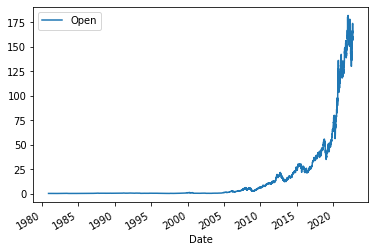

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends

In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
2022-05-06    0.230000
2022-08-05    0.230000
Name: Dividends, Length: 76, dtype: float64

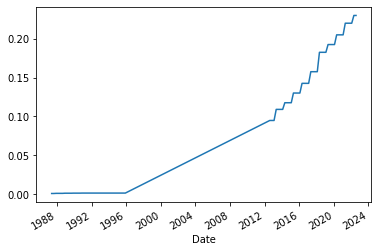

In [11]:
apple.dividends.plot()

### Exercise

Now using the Ticker module create an object for AMD (Advanced Micro Devices) with the ticker symbol is AMD called; name the object amd.

In [13]:
amd = yf.Ticker("AMD")

In [14]:
amd_info = amd.info
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [15]:
amd_info['country']

'United States'

In [16]:
amd_info['sector']

'Technology'

In [17]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


In [18]:
amd_share_price_data.reset_index(inplace=True)

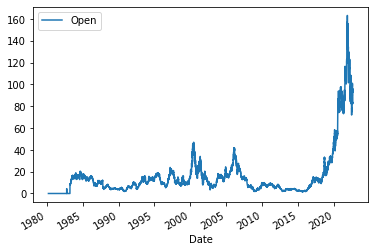

In [19]:
amd_share_price_data.plot(x="Date", y="Open")

# Extracting Stock Data Using a Web Scraping

In [20]:
#!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
!pip install plotly==5.3.1

     |████████████████████████████████| 62 kB 514 kB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
/usr/bin/sh: 1: mamba: not found
/usr/bin/sh: 1: mamba: not found
     |████████████████████████████████| 6.3 MB 7.6 MB/s eta 0:00:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 23.9 MB 20.6 MB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data  = requests.get(url).text

In [23]:
soup = BeautifulSoup(data, 'html5lib')

In [24]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [25]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [26]:
read_html_pandas_data = pd.read_html(url)

In [27]:
netflix_dataframe = read_html_pandas_data[0]
netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


### Exercise

In [28]:
amazon_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
html_data = requests.get(amazon_url).text

In [29]:
beautiful_soup = BeautifulSoup(html_data, 'html5lib')

In [30]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [31]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [32]:
for col in amazon_data.columns:
    print(col)

Date
Open
High
Low
Close
Volume
Adj Close


In [37]:
amazon_data.iloc[-1]["Open"]

'109.35'